# 教學目標:
    了解 Convolution 卷積的組成

# 範例內容:
    定義單步的卷積
    
    輸出卷積的計算值


# 作業:
    修改 a_slice_prev, 檢查 Z 的輸出

In [1]:
import numpy as np

In [2]:
# GRADED FUNCTION: conv_single_step
def conv_single_step(a_slice_prev, W, b):
    """
    定義一層 Kernel (內核), 使用的參數說明如下
    Arguments:
        a_slice_prev -- 輸入資料的維度
        W -- 權重, 被使用在 a_slice_prev
        b -- 偏差參數 
    Returns:
        Z -- 滑動窗口（W，b）卷積在前一個 feature map 上的結果
    """

    # 定義一個元素介於 a_slice and W
    s = a_slice_prev * W
    # 加總所有的 "s" 並指定給Z.
    Z = np.sum(s)
    # Add bias b to Z. 這是 float() 函數,
    Z = float(Z + b)

    return Z

In [3]:
#np.set_printoptions(formatter={'float': '{: 0.5f}'.format})\n

'''
seed( ) 用於指定隨機數生成時所用算法開始的整數值，
如果使用相同的seed( )值，則每次生成的隨即數都相同，
如果不設置這個值，則係統根據時間來自己選擇這個值，
此時每次生成的隨機數因時間差異而不同。
'''

for win in np.arange(1,11):
    np.random.seed(1)
    #定義一個 axaxd 的 feature map
    a_slice_prev = np.random.randn(win,win,3) 
    W = np.random.randn(win,win,3)
    b = np.random.randn(1, 1, 1)

    #取得計算後,卷積矩陣的值
    Z = conv_single_step(a_slice_prev, W, b)
    print(f"window size = ({win:>3},{win:>3})\tZ ={Z}")

window size = (  1,  1)	Z =0.6881292162332981
window size = (  2,  2)	Z =2.3410402861052764
window size = (  3,  3)	Z =-5.19283565556167
window size = (  4,  4)	Z =-6.999089450680221
window size = (  5,  5)	Z =3.1104032107031885
window size = (  6,  6)	Z =-2.955999360322654
window size = (  7,  7)	Z =-11.900332396440044
window size = (  8,  8)	Z =-5.897160569766038
window size = (  9,  9)	Z =-17.060478521246942
window size = ( 10, 10)	Z =-3.7898536662889555


In [4]:
# ref: Day094 ppt p5 
a_slice_prev = np.array([[ 0,  0,  0], [ 0,  4,  9], [ 0,  5,  6]])
W            = np.array([[ 1,  0, -1], [ 1,  0, -1], [ 1,  0, -1]])
b            = np.zeros((1, 1, 1), dtype=int) 

Z = conv_single_step(a_slice_prev, W, b)
print("Z =", Z)

Z = -15.0


In [5]:
# https://github.com/fanghao6666/neural-networks-and-deep-learning/blob/master/py/Convolution%20model%20Step%20by%20Step%20v1.py.html
# GRADED FUNCTION: conv_single_step

def conv_single_step(a_slice_prev, W, b):
    """
    Apply one filter defined by parameters W on a single slice (a_slice_prev) of the output activation 
    of the previous layer.
    
    Arguments:
    a_slice_prev -- slice of input data of shape (f, f, n_C_prev)
    W -- Weight parameters contained in a window - matrix of shape (f, f, n_C_prev)
    b -- Bias parameters contained in a window - matrix of shape (1, 1, 1)
    
    Returns:
    Z -- a scalar value, result of convolving the sliding window (W, b) on a slice x of the input data
    """

    ### START CODE HERE ### (≈ 2 lines of code)
    # Element-wise product between a_slice and W. Add bias.
    s = a_slice_prev * W + b
    # Sum over all entries of the volume s
    Z = np.sum(s)
    ### END CODE HERE ###

    return Z


# In[38]:

np.random.seed(1)
a_slice_prev = np.random.randn(4, 4, 3)
W = np.random.randn(4, 4, 3)
b = np.random.randn(1, 1, 1)

Z = conv_single_step(a_slice_prev, W, b)
print("Z =", Z)

Z = -23.16021220252078


In [6]:
def zero_pad(X, pad):
    """
    Pad with zeros all images of the dataset X. The padding is applied to the height and width of an image, 
    as illustrated in Figure 1.
    
    Argument:
    X -- python numpy array of shape (m, n_H, n_W, n_C) representing a batch of m images
    pad -- integer, amount of padding around each image on vertical and horizontal dimensions
    
    Returns:
    X_pad -- padded image of shape (m, n_H + 2*pad, n_W + 2*pad, n_C)
    """
    
    ### START CODE HERE ### (≈ 1 line)
    X_pad = np.pad(X,((0,0),(pad,pad),(pad,pad),(0,0)),'constant',constant_values = 0)
    ### END CODE HERE ###
    
    return X_pad

In [7]:
from sklearn import datasets, metrics

digits = datasets.load_digits()

In [8]:
# ref: https://lovesnowbest.site/2018/02/24/Intro-to-Convolutional-Neural-Networks/
def conv_forward(A_prev, W, b, hparameters):
    """
    Implements the forward propagation for a convolution function
    
    Arguments:
    A_prev -- output activations of the previous layer, numpy array of shape (m, n_H_prev, n_W_prev, n_C_prev)
    W -- Weights, numpy array of shape (f, f, n_C_prev, n_C)
    b -- Biases, numpy array of shape (1, 1, 1, n_C)
    hparameters -- python dictionary containing "stride" and "pad"
        
    Returns:
    Z -- conv output, numpy array of shape (m, n_H, n_W, n_C)
    cache -- cache of values needed for the conv_backward() function
    """
    
    ### START CODE HERE ###
    # Retrieve dimensions from A_prev's shape (≈1 line)  
    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape
    
    # Retrieve dimensions from W's shape (≈1 line)
    (f, f, n_C_prev, n_C) = W.shape
    #print(W.shape)
    
    # Retrieve information from "hparameters" (≈2 lines)
    stride = hparameters['stride']
    pad = hparameters['pad']
    
    # Compute the dimensions of the CONV output volume using the formula given above. Hint: use int() to floor. (≈2 lines)
    n_H = int((n_H_prev+2*pad-f)/stride+1)
    n_W = int((n_W_prev+2*pad-f)/stride+1)
    
    # Initialize the output volume Z with zeros. (≈1 line)
    Z = np.zeros((m,n_H,n_W,n_C))
    #print(Z.shape)
    
    # Create A_prev_pad by padding A_prev
    A_prev_pad = zero_pad(A_prev,pad)
    
    for i in range(m):                               # loop over the batch of training examples
        a_prev_pad = A_prev_pad[i]                  # Select ith training example's padded activation
        for h in range(n_H):                           # loop over vertical axis of the output volume
            for w in range(n_W):                       # loop over horizontal axis of the output volume
                for c in range(n_C):                   # loop over channels (= #filters) of the output volume
                    
                    # Find the corners of the current "slice" (≈4 lines)
                    vert_start = h*stride
                    vert_end = h*stride+f
                    horiz_start = w*stride
                    horiz_end = w*stride+f
                    
                    # Use the corners to define the (3D) slice of a_prev_pad (See Hint above the cell). (≈1 line)
                    a_slice_prev = a_prev_pad[vert_start:vert_end,horiz_start:horiz_end,:]
                    # Convolve the (3D) slice with the correct filter W and bias b, to get back one output neuron. (≈1 line)
                    Z[i, h, w, c] = conv_single_step(a_slice_prev,W[:,:,:,c],b[:,:,:,c])
                                        
    ### END CODE HERE ###
    
    # Making sure your output shape is correct
    assert(Z.shape == (m, n_H, n_W, n_C))
    
    # Save information in "cache" for the backprop
    cache = (A_prev, W, b, hparameters)
    
    return Z, cache

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline  
def plot_images(raw_img, conv_img):
    fig, ax_arr = plt.subplots(1, 2)
    ax_arr[0].set_title('raw')
    ax_arr[0].imshow(raw_img, cmap="gray_r")
    ax_arr[1].set_title('conv')
    ax_arr[1].imshow(conv_img, cmap="gray_r")

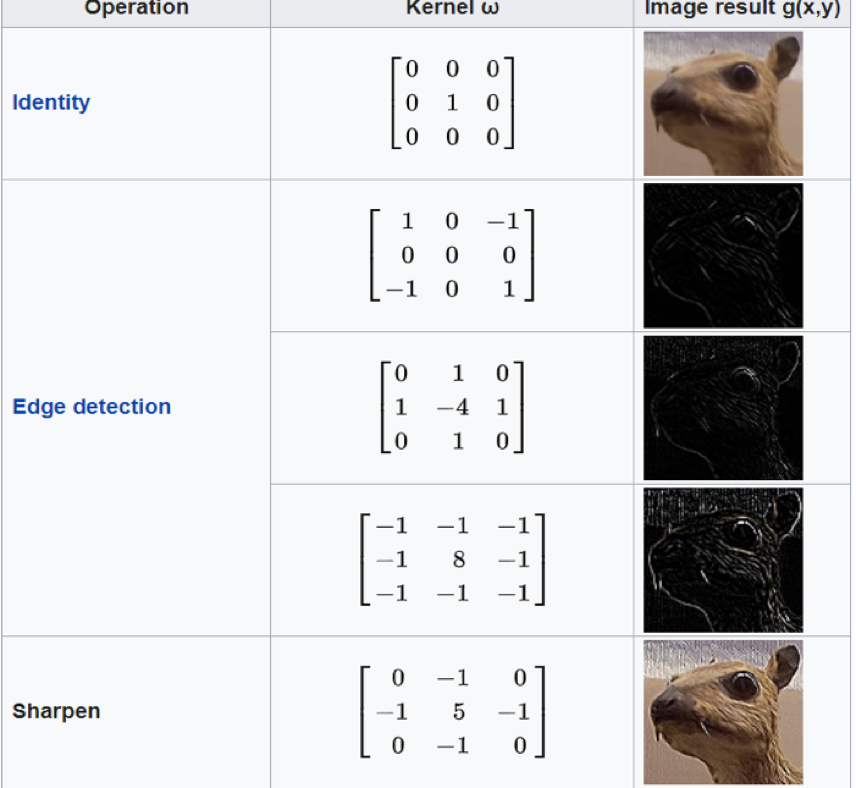

In [10]:
sharpen = np.array([[ 0, -1,  0],
                    [-1,  5, -1],
                    [ 0, -1,  0]])

identity = np.array([[ 0,  0,  0],
                     [ 0,  1,  0],
                     [ 0,  0,  0]])
edge_detect = np.array([[-1, -1, -1],
                        [-1,  8, -1],
                        [-1, -1, -1]])


In [11]:
(IMG_W, IMG_H) = (8, 8)
raw_img = digits.data.reshape(-1, IMG_W, IMG_H)[0]
print(raw_img.shape)

img = raw_img.reshape(1, IMG_W, IMG_W, 1)

(8, 8)


========== filter (identity) test ==========
filter=
[[0 0 0]
 [0 1 0]
 [0 0 0]]



{'stride': 1, 'pad': 1}

raw image
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
==>
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]



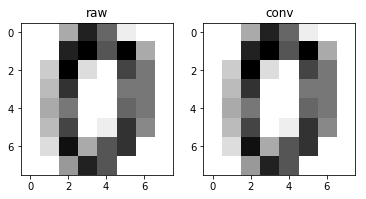

In [12]:
print(f"{'='*10} filter (identity) test {'='*10}")
conv_filter = identity

w = conv_filter.shape[0]
h = conv_filter.shape[1]

W = conv_filter.reshape(w, h, 1, 1)
b = np.zeros((1, 1, 1, 1), dtype=int)

print(f"filter=\n{conv_filter}")
opts_stride = [1]
for stride in opts_stride:
    pad = W.shape[0] // 2
    hparameters = {"stride" : stride, "pad": pad}

    print(f"\n\n{'='*60}")
    print()
    print(hparameters)
    print()

    print("raw image")
    print(f"{raw_img}")

    A_prev = img
    conv_img, cache_conv = conv_forward(A_prev, W, b, hparameters)

    w = conv_img.shape[1]
    h = conv_img.shape[2]
    print(f"==>\n{conv_img.reshape(w,h)}")
    print()
    
    plot_images(raw_img, conv_img.reshape(w,h))      

========== filter (sharpen) test ==========
filter=
[[ 0 -1  0]
 [-1  5 -1]
 [ 0 -1  0]]



{'stride': 1, 'pad': 1}

raw image
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
==>
[[  0.  -5.  -1.  36.  21. -19.  -6.   0.]
 [  0. -16.  30.  37.  11.  48.   2.  -5.]
 [ -3.  -4.  45. -20. -23.  24.  16.  -8.]
 [ -4.   0.  33. -14.  -8.  12.  16.  -8.]
 [ -5.   9.  12.  -8. -10.  17.  16.  -8.]
 [ -4.   2.  29. -17. -17.  31.  15.  -7.]
 [ -2.  -8.  46. -12.  22.  38. -19.   0.]
 [  0.  -8.   3.  44.  27. -22.   0.   0.]]




{'stride': 2, 'pad': 1}

raw image
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.

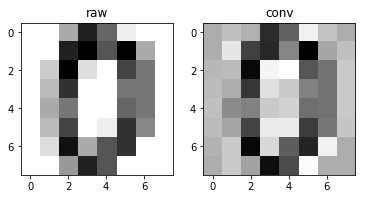

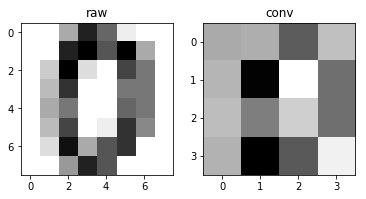

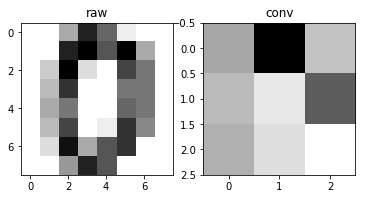

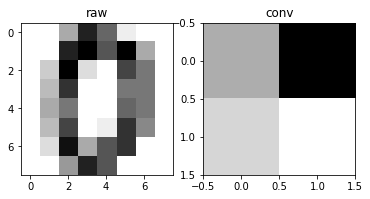

In [13]:
print(f"{'='*10} filter (sharpen) test {'='*10}")

conv_filter = sharpen

w = conv_filter.shape[0]
h = conv_filter.shape[1]

W = conv_filter.reshape(w, h, 1, 1)
b = np.zeros((1, 1, 1, 1), dtype=int)

print(f"filter=\n{conv_filter}")
opts_stride = [1, 2, 3, 4]
for stride in opts_stride:
    pad = W.shape[0] // 2
    hparameters = {"stride" : stride, "pad": pad}

    print(f"\n\n{'='*60}")
    print()
    print(hparameters)
    print()

    print("raw image")
    print(f"{raw_img}")

    A_prev = img
    conv_img, cache_conv = conv_forward(A_prev, W, b, hparameters)

    w = conv_img.shape[1]
    h = conv_img.shape[2]
    print(f"==>\n{conv_img.reshape(w,h)}")
    print()
    
    plot_images(raw_img, conv_img.reshape(w,h))      

========== filter (edge_detect) test ==========
filter=
[[-1 -1 -1]
 [-1  8 -1]
 [-1 -1 -1]]



{'stride': 1, 'pad': 1}

raw image
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
==>
[[  0. -18.  -1.  52.  18. -31. -21.  -5.]
 [ -3. -36.  51.  53.  14.  76.   5. -13.]
 [ -7. -20.  71. -49. -61.  34.  17. -21.]
 [-12. -11.  59. -37. -30.  20.  20. -24.]
 [-13.   1.  28. -32. -30.  28.  20. -23.]
 [-11.  -8.  50. -49. -40.  49.  15. -15.]
 [ -6. -19.  71. -25.  27.  56. -31.  -7.]
 [ -2. -22.  14.  59.  40. -32. -12.   0.]]




{'stride': 2, 'pad': 1}

raw image
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.

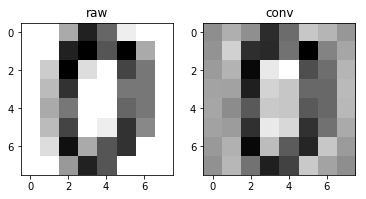

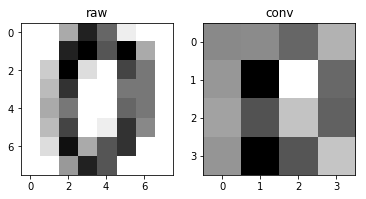

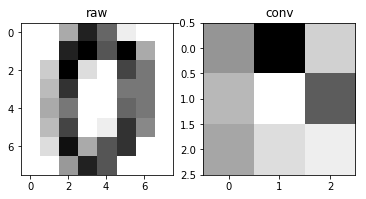

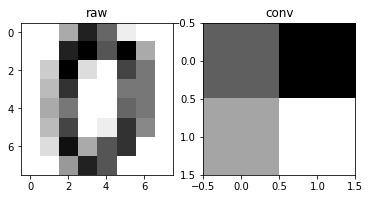

In [14]:
print(f"{'='*10} filter (edge_detect) test {'='*10}")

conv_filter = edge_detect

w = conv_filter.shape[0]
h = conv_filter.shape[1]

W = conv_filter.reshape(w, h, 1, 1)
b = np.zeros((1, 1, 1, 1), dtype=int)

print(f"filter=\n{conv_filter}")
opts_stride = [1, 2, 3, 4]
for stride in opts_stride:
    pad = W.shape[0] // 2
    hparameters = {"stride" : stride, "pad": pad}

    print(f"\n\n{'='*60}")
    print()
    print(hparameters)
    print()

    print("raw image")
    print(f"{raw_img}")

    A_prev = img
    conv_img, cache_conv = conv_forward(A_prev, W, b, hparameters)

    w = conv_img.shape[1]
    h = conv_img.shape[2]
    print(f"==>\n{conv_img.reshape(w,h)}")
    print()
    
    plot_images(raw_img, conv_img.reshape(w,h)) 